# 0. Download the dataset

1.   Go to [Link to Data](https://universe.roboflow.com/jacob-solawetz/flowers_classification)




In [2]:
!curl -L "https://universe.roboflow.com/ds/YA0mcKgF2X?key=LNHbYVG20A" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   3598      0 --:--:-- --:--:-- --:--:--  3612
100 16.7M  100 16.7M    0     0  11.6M      0  0:00:01  0:00:01 --:--:-- 34.0M
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
   creating: test/
   creating: test/daisy/
 extracting: test/daisy/10466290366_cc72e33532_jpg.rf.5edb22cff3d68a6171712ddd7c5a1ba1.jpg  
 extracting: test/daisy/10466558316_a7198b87e2_jpg.rf.aa85db655721b7b8bfb327e76dd5f287.jpg  
 extracting: test/daisy/12193032636_b50ae7db35_n_jpg.rf.a46a8b3cd87cbf2cf47e4f45d799c8d6.jpg  
 extracting: test/daisy/1342002397_9503c97b49_jpg.rf.1db5d24016bc3243ca0e2c371c9173b9.jpg  
 extracting: test/daisy/1354396826_2868631432_m_jpg.rf.2dec5edc5b71a1ae1db5863d90216b5e.jpg  
 extracting: test/daisy/1374193928_a52320eafa_jpg.rf.4b18b851b9f7f596290ee

In [3]:
!ls

README.dataset.txt  README.roboflow.txt  sample_data  test  train  valid


In [14]:
from pathlib import Path
from tensorflow import keras
import json
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. Explore data

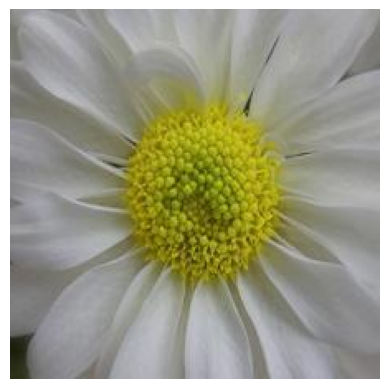

In [5]:
#Ejemplo daisy
# Ruta de la imagen
image_path = '/content/train/daisy/100080576_f52e8ee070_n_jpg.rf.0301299664b25745e36c1eaa2db2f64a.jpg'

# Leer la imagen
img = mpimg.imread(image_path)

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Ocultar los ejes
plt.show()

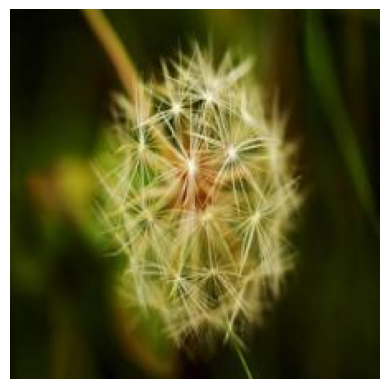

In [6]:
#Ejemplo dandelion
# Ruta de la imagen
image_path = '/content/train/dandelion/10043234166_e6dd915111_n_jpg.rf.5bf03f08bfed88df80a550fed8f9b499.jpg'

# Leer la imagen
img = mpimg.imread(image_path)

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Ocultar los ejes
plt.show()

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rutas de las imágenes
train_dir = Path('/content/train')
test_dir = Path('/content/test')

# Usamos ImageDataGenerator para cargar las imágenes y hacer Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Escala los valores de las imágenes entre 0 y 1
    shear_range=0.2,           # Data aumentarion
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Solo normalización para el conjunto de test, No hay que aplicar los data aumentation

# Cargar imágenes y crear generadores para train y test
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),    # Tamaño de las imágenes de entrada
    batch_size=32,
    class_mode='binary'        # Es un problema de clasificación binaria (daisy vs dandelion)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Definir el modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Usamos 'sigmoid' para clasificación binaria
])

# Compilamos el modelo
model.compile(
    loss='binary_crossentropy',  # Usamos crossentropy para clasificación binaria
    optimizer='adam',
    metrics=['accuracy']
)

# Entrenamos el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=100,         # Número de pasos por época
    epochs=10,                   # Número de épocas
    validation_data=test_generator,
    validation_steps=50         # Número de pasos de validación
)

Found 1275 images belonging to 2 classes.
Found 182 images belonging to 2 classes.
Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.5904 - loss: 0.7383 - val_accuracy: 0.7253 - val_loss: 0.5987
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.7088 - loss: 0.5898 - val_accuracy: 0.7363 - val_loss: 0.5184
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.7489 - loss: 0.5125 - val_accuracy: 0.7582 - val_loss: 0.5280
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.7913 - loss: 0.4509 - val_accuracy: 0.8132 - val_loss: 0.4149
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.8319 - loss: 0.3777 - val_accuracy: 0.8132 - val_loss: 0.4230
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.8268 - loss: 0.3868 - val_accuracy: 0.8132 - val_loss: 0.4010
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.8382 - loss: 0.3534 - val_accuracy: 0.8132 - val_loss: 0.3896
Epoch 8/1

In [10]:
test_loss, test_accuracy = model.evaluate(test_generator, steps= 50)
print(f'Pérdida en test: {test_loss}')
print(f'Precisión en test: {test_accuracy}')

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8473 - loss: 0.3545 
Pérdida en test: 0.3548212945461273
Precisión en test: 0.8461538553237915


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Número de imágenes mal clasificadas: 28


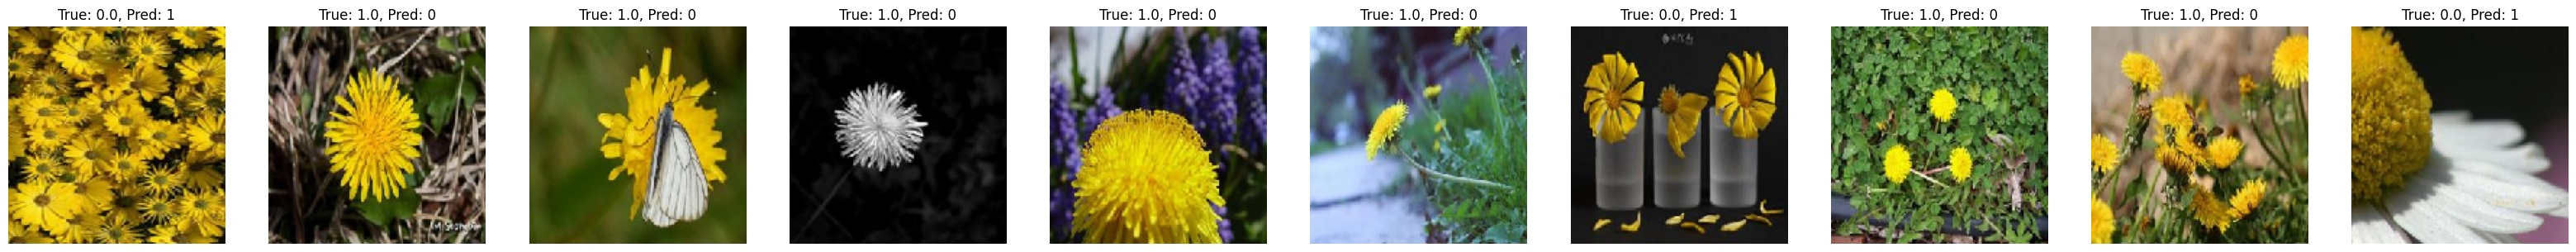

In [30]:
misclassified_images = []
misclassified_labels = []
misclassified_preds = []

# Cargar las imágenes y etiquetas del conjunto de test
test_images, test_labels = [], []

# Iterar a través del conjunto de prueba para obtener las imágenes y etiquetas
for i in range(len(test_generator)):
    x_batch, y_batch = test_generator[i]  # Las imágenes y las etiquetas
    test_images.append(x_batch)
    test_labels.append(y_batch)

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

# Realizar predicciones
predictions = model.predict(test_images)

# Determinar si las predicciones son correctas
for i in range(len(test_images)):
    pred_label = 1 if predictions[i] > 0.5 else 0  # Convertir predicción en clase binaria
    true_label = test_labels[i]

    # Si la predicción es incorrecta, agregar la imagen a la lista
    if pred_label != true_label:
        misclassified_images.append(test_images[i])
        misclassified_labels.append(true_label)
        misclassified_preds.append(pred_label)

# Mostrar algunas de las imágenes donde el modelo falla
num_misclassified = len(misclassified_images)
print(f"Número de imágenes mal clasificadas: {num_misclassified}")

# Visualizar las primeras 5 imágenes mal clasificadas
plt.figure(figsize=(40, 40))
for i in range(min(10, num_misclassified)):  # Mostrar un máximo de 5 imágenes
    plt.subplot(1, 10, i+1)
    img = misclassified_images[i]
    img = np.clip(img, 0, 1)  # Asegurarse de que los valores de la imagen estén entre 0 y 1
    plt.imshow(img)
    plt.title(f'True: {misclassified_labels[i]}, Pred: {misclassified_preds[i]}')
    plt.axis('off')
plt.show()

Como se observa cuando aparecen otros componentes en la imagen no es capaz de detectar muy bien la clase, también cuando las fotos son muy ampliadas o muy alejadas. Es posible que al conjunto de entrenamiento le falten este tipo de imágenes.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


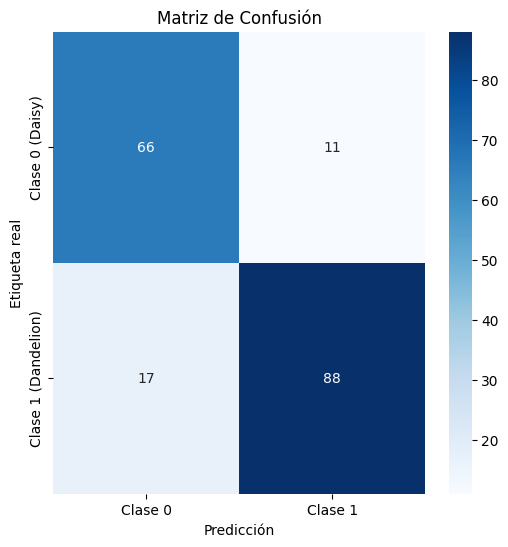

Matriz de Confusión:
[[66 11]
 [17 88]]


In [26]:
# Obtener las predicciones del modelo
predictions = model.predict(test_images)

# Convertir las predicciones a clases binarias (0 o 1)
pred_labels = (predictions > 0.5).astype(int)

# Obtener las etiquetas verdaderas
true_labels = test_labels

# Calcular la matriz de confusión
cm = confusion_matrix(true_labels, pred_labels)

# Mostrar la matriz de confusión usando un heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0 (Daisy)", "Clase 1 (Dandelion)"])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta real')
plt.title('Matriz de Confusión')
plt.show()

# Imprimir la matriz de confusión en formato legible
print("Matriz de Confusión:")
print(cm)

Como observamos en la matriz de confusión está bastante repartida entre ambas clases, aunque el error está un poco más pronunciado en la predicción de la clase 0.